# Load Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

titanic = pd.read_csv("../st2195_Assignment_7/titanic.csv")

In [2]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Compute family size

In [4]:
titanic['family size'] = titanic['SibSp']+titanic['Parch'] + 1

#### Convert Survived and Pclass to categorical variables

In [5]:
d_Survived={0:"No",1:"Yes"}
d_Pclass={1:"1st",2:"2nd",3:"3rd"}
titanic['Survived'] = titanic['Survived'].astype('category').apply(lambda x:d_Survived[x])
titanic['Pclass'] = titanic['Pclass'].astype('category').apply(lambda x:d_Pclass[x])
titanic.head()     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family size
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,No,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 1. Generate a series of bar charts to describe the : (a) gender, (b) ticket class, and (c) survival of the passengers onboard.

### 1a - Bar chart for gender

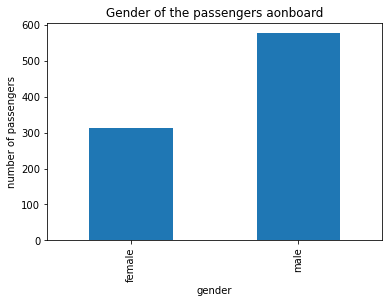

In [6]:
titanic.groupby('Sex').size().plot.bar(title = 'Gender of the passengers aonboard',
                                      ylabel = "number of passengers", xlabel = "gender")
plt.show()

#we did not call fig, ax = plt.subplots() and then pass ax into pandas dataframe/series plot().
# we could use fig, ax = plt.subplots( and then pass ax into Dataframe/Series Plot(), but do not have to)

In [7]:
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

#### 1a alternative = Bar Chart for Gender (using kind='bar'; other suitable options are 'barh', 'pie')

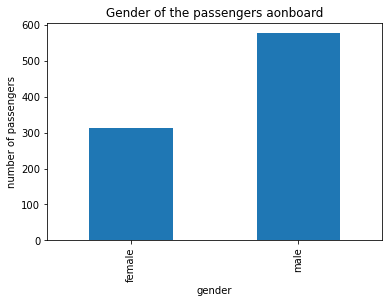

In [8]:
titanic.groupby('Sex').size().plot(kind='bar',
                                  title = 'Gender of the passengers aonboard',
                                      ylabel = "number of passengers", xlabel = "gender")

plt.show()

female
male


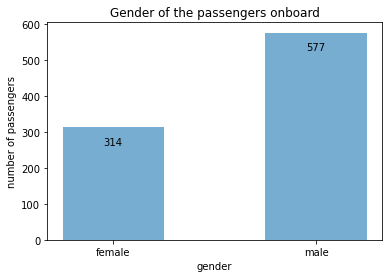

In [9]:
# Bar chart on gender with data values shown
# method 1

fig, ax = plt.subplots()

plot_data = titanic.groupby('Sex').size()

ax.bar(plot_data.index, plot_data, alpha=0.6, #makes bars lightly transparent 
       width = 0.5) #makes the bar thinner)
ax.set_title('Gender of the passengers onboard')
ax.set_ylabel("number of passengers")
ax.set_xlabel("gender")

for i in range(len(plot_data.index)):
    print(plot_data.index[i])
    ax.text(x=plot_data.index[i], y=plot_data[i]-50, s=int(plot_data[i]), ha='center')
    
plt.show()

In [10]:
len(plot_data.index)

2

In [11]:
plot_data.index

Index(['female', 'male'], dtype='object', name='Sex')

In [12]:
plot_data[0]

314

<ipython-input-13-452d69866ae3>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=bar.get_height(),


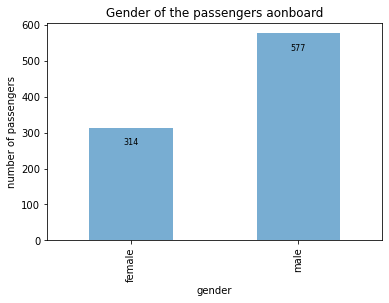

In [13]:
# Bar chart on gender with data values shown 
# method 2

fig, ax = plt.subplots()

plot_data = titanic.groupby('Sex').size()

ax = plot_data.plot(kind='bar',
                    title = 'Gender of the passengers aonboard',
                    ylabel = "number of passengers", xlabel = "gender",
                    alpha=0.6, #makes bars lightly transparent 
                    width = 0.5) #makes the bar thinner)

# Iterrating over the bars one by one
for bar in ax.patches:
    
    # Using matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_s() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasingL (0, 8)
    ax.annotate(s=bar.get_height(),
               xy=(bar.get_x()+bar.get_width()/2, bar.get_height()),
               ha="center", va="center",
    size=8, xytext=(0, -15),
    textcoords='offset points')
    
plt.show()

In [14]:
# Bar chart on gender with data values 
# method 3

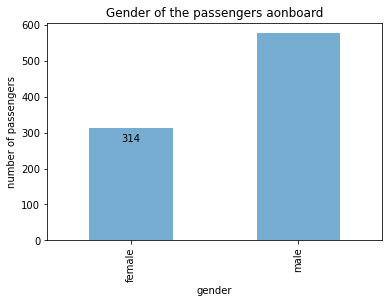

In [15]:
fig,ax = plt.subplots()

plot_data = titanic.groupby('Sex').size()
ax = plot_data.plot(kind='bar',
                    title = 'Gender of the passengers aonboard',
                    ylabel = "number of passengers", xlabel = "gender",
                    alpha=0.6, #makes bars lightly transparent 
                    width = 0.5) #makes the bar thinner)

# Iterrating over the bars one by one
for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x,y = bar.get_xy()
    ax.text(x+width/2,
           y+height-30,
           int(height),
           horizontalalignment='center', verticalalignment='center')
    
    plt.show()

#### 1b. Bar chart on ticket cass

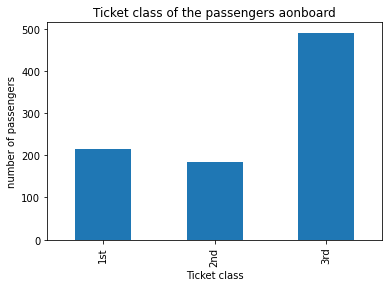

In [16]:
ax = titanic.groupby('Pclass').size().plot.bar(title = 'Ticket class of the passengers aonboard',
                                      ylabel = "number of passengers", xlabel = "Ticket class")

# ax.set_xticklabels(("1st Class","2nd Class", "3rd class"))
plt.show()

#### 1c - Bar chart for survival

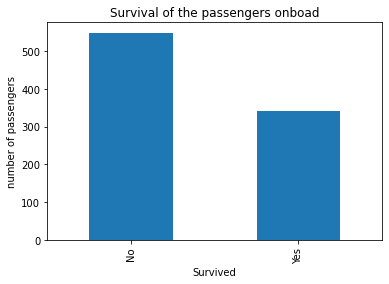

In [17]:
ax = titanic.groupby('Survived').size().plot.bar(title = 'Survival of the passengers onboad',
                                      ylabel = "number of passengers", xlabel = "Survived")

# ax.set_xticklabels(("Did not survive", "Survived"))
plt.show()

#### 2. Generate a histogram for the passengers’ age. Furthermore, describe the passengers’ age using the following two boxplots: (a) age per ticket class and (b) age based on survival.


##### Histogram on age

<AxesSubplot:title={'center':'Age of the passenfers onboard'}, ylabel='Frequency'>

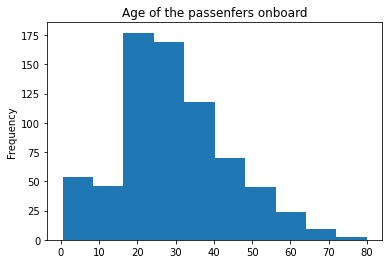

In [18]:
titanic['Age'].plot(kind = 'hist', title = "Age of the passenfers onboard")

<AxesSubplot:title={'center':'Age of the passengers onboard'}, ylabel='Frequency'>

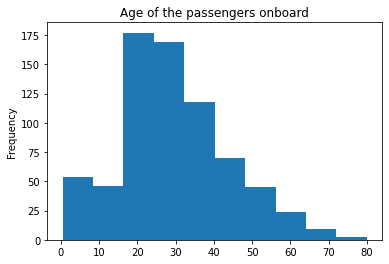

In [19]:
titanic['Age'].plot.hist(title = "Age of the passengers onboard")

#### 2a. boxplot on age grouped by ticket class

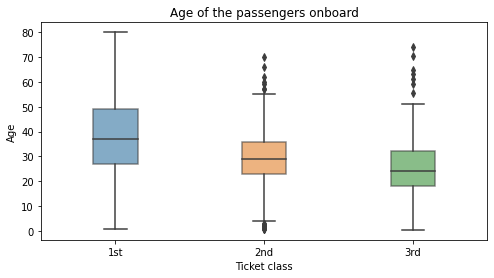

In [20]:
fig, ax = plt.subplots(figsize = (8,4))

sns.boxplot(data = titanic, x ="Pclass", y = "Age", width = 0.3,
           boxprops = dict(alpha=0.6))
# note in seaborn alpha and other parametes is set in a different way

ax.set_xlabel("Ticket class")
ax.set_title("Age of the passengers onboard")
#ax.set_xtickLabels(("1st Class", "2nd Class", "3rd Class"))
plt.show()

#### 2b. boxplot on age grouped by survival

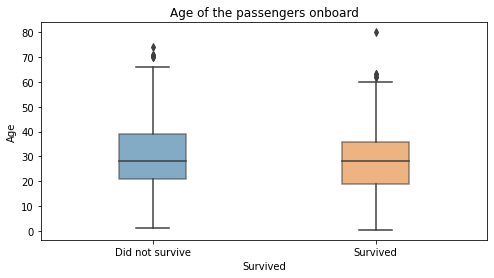

In [21]:
fig, ax = plt.subplots(figsize = (8,4))

sns.boxplot(data = titanic, x ="Survived", y = "Age", width = 0.3,
           boxprops = dict(alpha=0.6))
# note in seaborn alpha and other parametes is set in a different way


ax.set_title("Age of the passengers onboard")
#ax.set_xlabel("Ticket class")
ax.set_xticklabels(("Did not survive", "Survived"))
plt.show()

### 3.Generate a histogram for the travel fare and a table showing the number of people who did not pay – you may want to check on Google why a handful of people was on board for free!
#### some people could get the ticket for free because some of them maybe are the employees of the company, etc.

##### Histogram on travel fare

<AxesSubplot:title={'center':'Travel fare for the passengers onboard'}, ylabel='Frequency'>

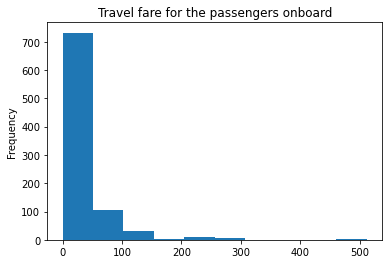

In [22]:
titanic['Fare'].plot(kind='hist', title="Travel fare for the passengers onboard", xlabel='fare')

In [23]:
titanic[['Fare']].apply(lambda x: x==0).groupby('Fare').size()

Fare
False    876
True      15
dtype: int64

In [24]:
#list(titanic[['Fare']].apply(lambda x: x==0).groupby('Fare'))

### 4. A chart of your choice to describe the family size per ticket class.

<function matplotlib.pyplot.show(close=None, block=None)>

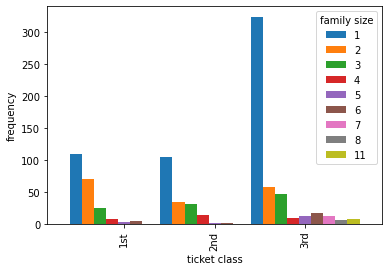

In [25]:
#### Bar chart on ticket class and family size

# ax = titanic.groupby(['Pclass', 'family size']).size(.unstack(.plot.bar(xlabel='ticket class', ylabel='frequency')
ax = titanic.groupby(['Pclass', 'family size']).size().unstack().fillna(0).plot.bar(width=1.2, xlabel='ticket class', ylabel='frequency')

plt.show

In [26]:
titanic.groupby(['Pclass', 'family size']).size()

Pclass  family size
1st     1              109
        2               70
        3               24
        4                7
        5                2
        6                4
        7                0
        8                0
        11               0
2nd     1              104
        2               34
        3               31
        4               13
        5                1
        6                1
        7                0
        8                0
        11               0
3rd     1              324
        2               57
        3               47
        4                9
        5               12
        6               17
        7               12
        8                6
        11               7
dtype: int64

In [27]:
titanic.groupby(['Pclass', 'family size']).size().unstack()

family size,1,2,3,4,5,6,7,8,11
Pclass,,,,,,,,,
1st,109,70,24,7,2,4,0,0,0
2nd,104,34,31,13,1,1,0,0,0
3rd,324,57,47,9,12,17,12,6,7


In [28]:
titanic.groupby(['Pclass', 'family size']).size().unstack(level=0)

Pclass,1st,2nd,3rd
family size,,,
1,109,104,324
2,70,34,57
3,24,31,47
4,7,13,9
5,2,1,12
6,4,1,17
7,0,0,12
8,0,0,6
11,0,0,7


In [29]:
titanic.groupby(['Pclass', 'family size']).size().unstack().fillna(0)

family size,1,2,3,4,5,6,7,8,11
Pclass,,,,,,,,,
1st,109,70,24,7,2,4,0,0,0
2nd,104,34,31,13,1,1,0,0,0
3rd,324,57,47,9,12,17,12,6,7


### Histogram to show the family size per ticket class

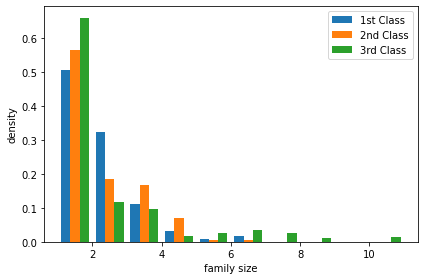

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# plots the histogram using density by ticket class
fig, ax = plt.subplots()
ax.hist([titanic.loc[titanic.Pclass==class_idx, 'family size'] for class_idx in ['1st', '2nd', '3rd']], density = True,
       label=['1st Class', '2nd Class', '3rd Class'])
ax.set_ylabel("density")
ax.set_xlabel("family size")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

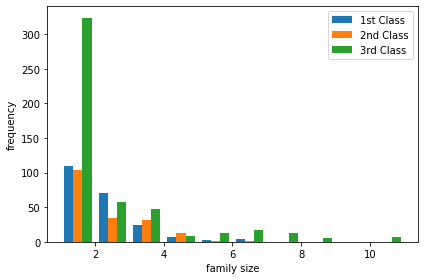

In [31]:
# plots the histogram using frequency by ticket class
fig, ax = plt.subplots()
ax.hist([titanic.loc[titanic.Pclass==class_idx, 'family size'] for class_idx in ['1st', '2nd', '3rd']], density = False,
       label=['1st Class', '2nd Class', '3rd Class'])
ax.set_ylabel("frequency")
ax.set_xlabel("family size")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [32]:
# What happens when you apply list comprehension to subset the dataframe by ticket class
#[titanic.loc[titanic.Pclass==class_idx, "family size"] for class_idx in ['1st','2nd','3rd']]

### Boxplots to show the family size per ticket class

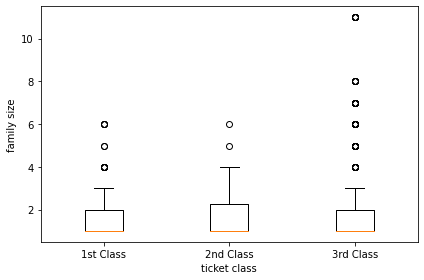

In [33]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

fig, ax = plt.subplots()
ax.boxplot([titanic[titanic['Pclass']=='1st']['family size'],
           titanic[titanic['Pclass']=='2nd']['family size'],
           titanic[titanic['Pclass']=='3rd']['family size']])
ax.set_ylabel("family size")
ax.set_xlabel("ticket class")
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
plt.tight_layout()
plt.show()


### Boxplots to show the family size per ticket class using SEABORN (alternative)

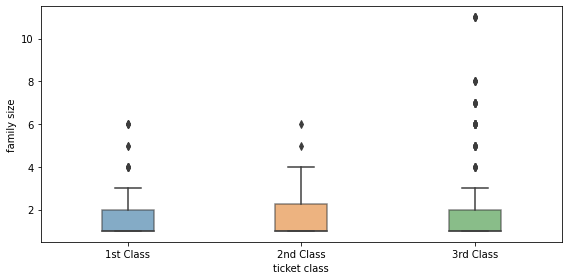

In [34]:
# plots the boxplot

fig, ax = plt.subplots(figsize = (8,4))

sns.boxplot(data = titanic, x ="Pclass", y = "family size", width = 0.3,
           boxprops = dict(alpha=0.6))
# note in seaborn alpha and other parametes is set in a different way

ax.set_ylabel("family size")
ax.set_xlabel("ticket class")
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
plt.tight_layout()
plt.show()


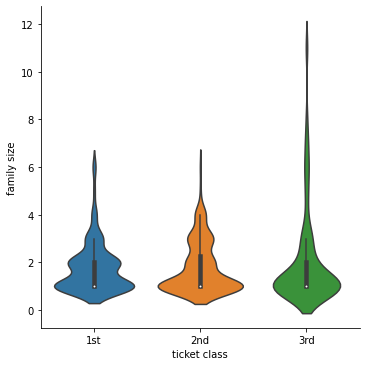

In [35]:
### Additional plots

sns.catplot(x='Pclass', y='family size', data=titanic, kind='violin')
plt.xlabel("ticket class")
plt.ylabel("family size")
plt.show()

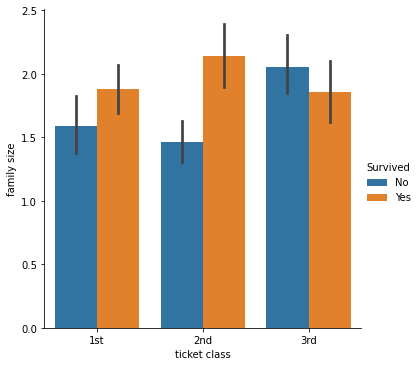

In [36]:
### Additional plots 2

sns.catplot(x='Pclass', y='family size', hue="Survived", data=titanic, kind='bar', estimator=np.mean)
plt.xlabel("ticket class")
plt.ylabel("family size")
plt.show()

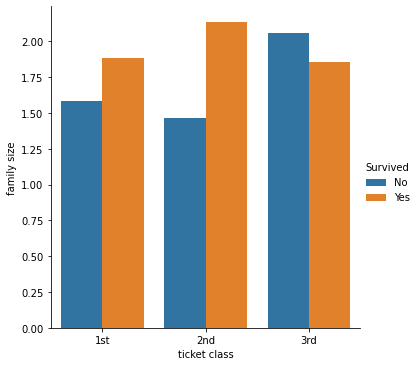

In [37]:
### Additional plots 2 with data values shown

g = sns.catplot(x='Pclass', y='family size', hue="Survived", data=titanic, kind='bar', ci=False, estimator=np.mean)
plt.xlabel("ticket class")
plt.ylabel("family size")
plt.show()

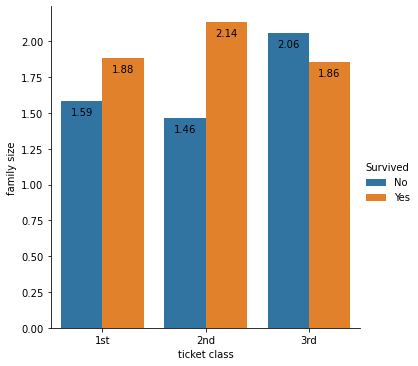

In [38]:
# extract the matplotlib azes_subplot objects from FacetGrid
ax = g.facet_axis(0,0)
for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    ax.text(x+width/2,
            y+height-0.1,
            round(height,2),
            size=10,
            horizontalalignment='center')
    
plt.show()

### 5. A series of stacked bar charts to show the how survival differs for different (a) gender and  (b) ticket class

#### 5a. Bar chart - survival by Gender

<AxesSubplot:title={'center':'Survival by Gender'}, xlabel='gender', ylabel='number of passengers'>

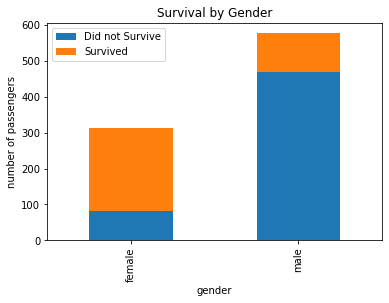

In [39]:
# Stacked bar chart on survival by gender

survival = titanic.groupby(['Sex','Survived']).size().unstack()
survival.columns = ["Did not Survive", "Survived"]
survival.plot(kind='bar', stacked=True, ylabel="number of passengers", xlabel="gender", title ="Survival by Gender")

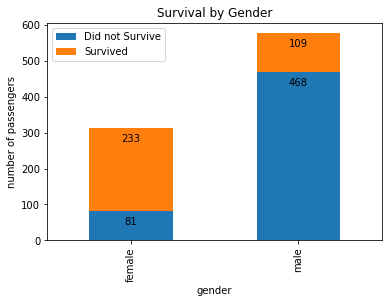

In [42]:
# stacked bar chart on survival by gender with data values shown

survival = titanic.groupby(['Sex','Survived']).size().unstack()
survival.columns = ["Did not Survive", "Survived"]
ax = survival.plot(kind='bar', stacked=True, ylabel="number of passengers", xlabel="gender", title ="Survival by Gender")

for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x,y = bar.get_xy()
    ax.text(x+width/2,
           y+height-30,
           int(height),
           horizontalalignment='center', verticalalignment='center')

#### 5b. Bar chart - survival by Ticket Class

<AxesSubplot:title={'center':'Survival by Ticket Class'}, xlabel='Ticket class', ylabel='number of passengers'>

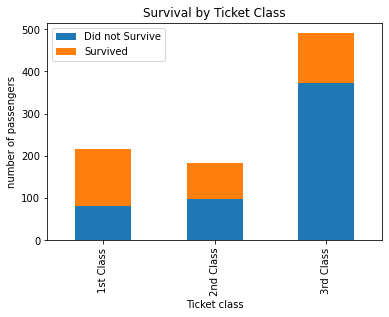

In [45]:
# Stacked bar chart on survival by Ticket class

survival = titanic.groupby(['Pclass','Survived']).size().unstack()
survival.columns = ["Did not Survive", "Survived"]
survival.index = ['1st Class', '2nd Class', "3rd Class"]
survival.plot(kind='bar', stacked=True, ylabel="number of passengers", xlabel="Ticket class", title ="Survival by Ticket Class")

### 6. A violin chart describing how survival related to age and gender

<function matplotlib.pyplot.show(close=None, block=None)>

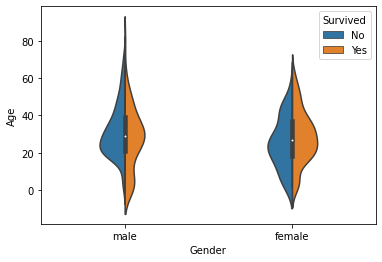

In [48]:
ax = sns.violinplot(data=titanic, x='Sex', y='Age', hue='Survived', width=0.3, split=True)
ax.set_xlabel("Gender")
plt.show

### 7. A violin chart describing the survival rate to age and ticket class

<function matplotlib.pyplot.show(close=None, block=None)>

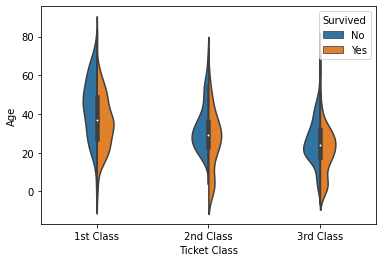

In [49]:
ax = sns.violinplot(data=titanic, x='Pclass', y='Age', hue='Survived', width=0.3, split=True)
ax.set_xlabel("Ticket Class")
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
plt.show

### From the graphs above, what kind of association between the variables like age, gender, ticket class and the surival?